# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [4]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [11]:
resource_url = 'https://books.toscrape.com/'
response = requests.get(resource_url, timeout=5)
# print("Estado",response.status_code) 

soup = BeautifulSoup(response.text, 'html.parser')
contenedores_libros = soup.find_all('article', class_='product_pod')  
# print(f"Total de libros encontrados: {len(contenedores_libros)}")

datos_libros = []
for libro in contenedores_libros:
    titulo = libro.select_one('a[title]')['title'].strip()    
    precio = libro.select_one('p.price_color').text.strip()   
    disponibilidad = libro.select_one('p.instock.availability').text.strip()
    datos_libros.append({
        'Titulo': titulo[:20],
        'Precio': precio[2:],
        'Disponibilidad': disponibilidad
    })

df_libros = pd.DataFrame(datos_libros)
df_libros['Precio'] = (
    df_libros['Precio']
    .astype(str)
    .str.replace('£', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)
df_libros['Precio'] = pd.to_numeric(df_libros['Precio'], errors='coerce') 
df_libros.dropna(subset=['Precio'], inplace=True)

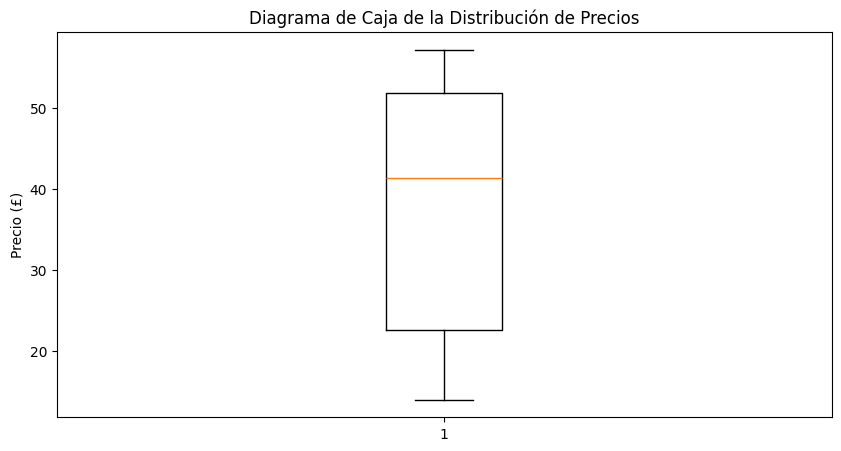

In [16]:
plt.figure(figsize = (10, 5))
# Debes pasar SOLO la columna numérica
plt.boxplot(df_libros['Precio']) 
plt.title("Diagrama de Caja de la Distribución de Precios")
plt.ylabel("Precio (£)")
plt.show()